In [1]:
from matplotlib import pyplot as plt

import torch
import torchvision

In [2]:
tf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
dataset = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=tf,
)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100000, shuffle=False, num_workers=0)

In [3]:
for images, labels in dataloader:
    break
print(images.shape)

torch.Size([60000, 1, 28, 28])


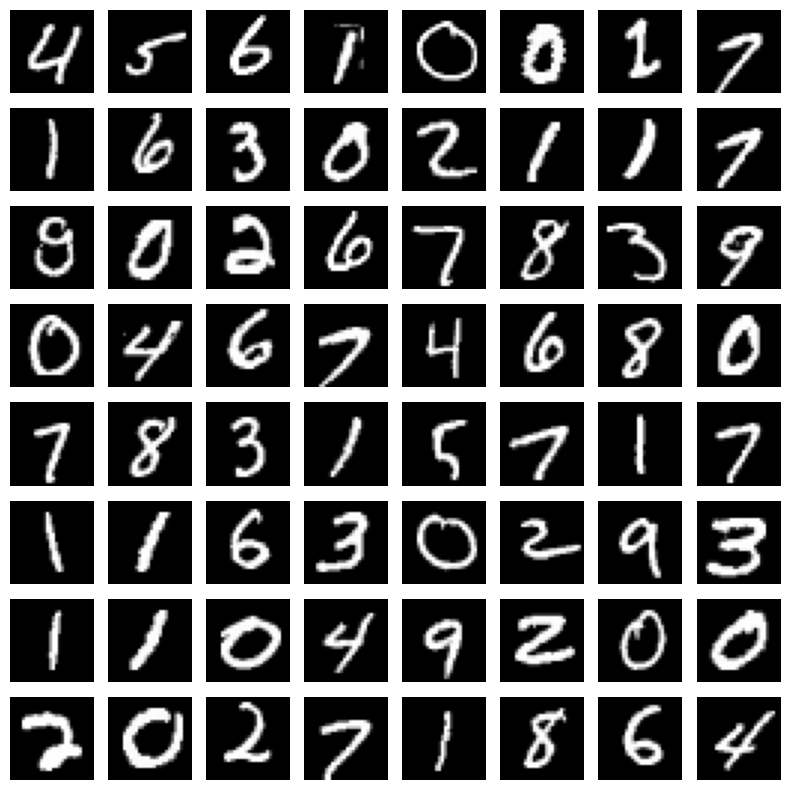

manually edit the clip_labels.txt to give text to the images


In [4]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[64+i].squeeze(0).numpy(), cmap='gray')
    ax.axis("off")
plt.tight_layout()
plt.show()
print('manually edit the clip_labels.txt to give text to the images')

In [35]:
class TextMnist(torch.utils.data.Dataset):
    def __init__(self, text_file):
        self.texts = self.__load_texts__(text_file)
        self.images = self.__load_images__(len(self.texts))
    
    def __load_texts__(self, text_file):
        with open(text_file, 'r') as file:
            lines = file.readlines()
        labels = []
        for line in lines:
            tmp = line.strip()
            if len(tmp) > 0:
                labels.append(tmp)
        return labels
    
    def __load_images__(self, count):
        tf = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
        dataset = torchvision.datasets.MNIST(
            "./data",
            train=True,
            download=True,
            transform=tf,
        )
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=count, shuffle=False, num_workers=0)
        for images, _ in dataloader:
            break
        return images
        
    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        return self.images[index], self.texts[index]

In [36]:
dataset = TextMnist(text_file='clip_labels.txt')
dataloader = torch.utils.data.DataLoader(dataset, batch_size=100000, shuffle=False, num_workers=0)

In [37]:
for images, texts in dataloader:
    break
print(images.shape)

torch.Size([64, 1, 28, 28])


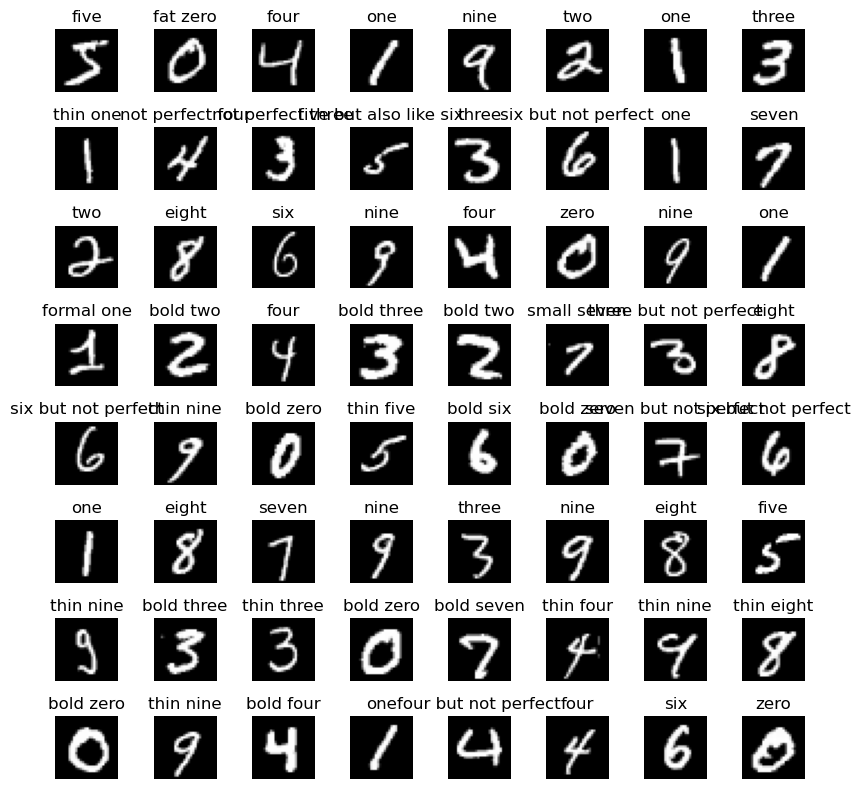

In [40]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(0).numpy(), cmap='gray')
    ax.axis("off")
    ax.set_title(texts[i])
plt.tight_layout()
plt.show()